## Machine Learning-Driven Property Valuation in NYC Real Estate

## Team Members
1. Vishveshwara Guthal (guthal)
2. Ariscia Mendes (amende17)
3. Swetha Narasimhan (Swetha1999)(POC)
4. Amaan Ali Khan (ak0477)

# Introduction
Accurate real estate property valuation is a critical need for stakeholders such as real estate companies, insurance firms, and home buyers. These stakeholders rely on precise pricing to make informed decisions on investments, insurance coverage, and purchases. Traditional valuation methods (e.g., comparative market analysis or expert appraisals) often struggle to adapt to rapid market changes and complex feature interactions.

To address this, our project leverages machine learning to estimate property values more reliably. In particular, we develop models using XGBoost (an ensemble gradient boosting method) and deep neural networks to predict property sale prices from a dataset of New York City (NYC) properties. By learning from historical data – including property attributes, location features, and neighborhood characteristics – these models aim to deliver data-driven valuations that meet the high accuracy demands of stakeholders. In summary, we propose a machine learning solution that ingests diverse property data and outputs an estimated market value for each property, providing an automated valuation tool for NYC real estate.

# Literature Survey
Sharma, Harsora, and Ogunleye (2024) evaluated several algorithms including Support Vector Regression, Random Forest, Multilayer Perceptrons (a type of deep neural network), and XGBoost for house price prediction. Their study found that XGBoost performed consistently well across evaluation metrics, primarily due to its ability to handle nonlinear relationships and missing data. DNNs also showed competitive performance but required more tuning and were less interpretable in comparison.

Abdul Rahman, Mutalib, and Zulkifley (2021) compared XGBoost and LightGBM against simpler models like linear regression. XGBoost achieved lower prediction errors, supporting its suitability for problems involving complex feature interactions such as those commonly found in real estate datasets.

A 2024 ArXiv preprint titled "An Optimal House Price Prediction Algorithm: XGBoost" highlighted XGBoost’s capability to deal with varying data quality and to model interactions without the need for extensive feature engineering. This is relevant in practical housing datasets where data can be noisy or incomplete.

A study published in JETIR (2024) also applied XGBoost to housing price prediction. The paper emphasized its robustness across different feature sets and market conditions, particularly in datasets with a large number of variables. The model's built-in feature importance ranking was also noted as useful for interpretability.

Another recent study from Pioneer Publisher (2024), using Ames housing data, concluded that XGBoost provided more accurate predictions than traditional models. It performed well in capturing variable interactions, which is beneficial in scenarios with diverse property characteristics.

In addition to XGBoost, some studies explored the use of deep neural networks. While DNNs generally require more data and tuning, they can be effective in capturing complex nonlinear relationships, especially when working with high-dimensional structured data. A few research papers suggest using DNNs when the dataset includes a wide range of features or non-tabular inputs, although interpretability remains a limitation.

Overall, the literature supports the use of XGBoost for structured, tabular housing datasets due to its accuracy and handling of feature interactions. DNNs, while less interpretable, are considered a strong alternative when modeling more complex patterns or integrating additional data types.



# Data and Methods

**Data**

The dataset used in this study contains 10,465 rows and 40 columns, compiled from publicly available real estate sources such as Zillow and Realtor.com, along with neighborhood level information. It includes core property features like property type, area in square feet, number of beds and baths, borough, lot size, and property value. What makes this dataset particularly useful for modeling is its integration of contextual variables that influence housing decisions but are often missing from traditional datasets. It includes actual crime data from NYPD and Data.gov and calculated distances to nearby amenities using OpenStreetMap, providing a fuller picture of both property characteristics and neighborhood conditions.

Location based features were further enriched by calculating distances to nearby amenities including parks, schools, malls, and public transport using geocoding data from the OpenStreetMap API. This allows the dataset to reflect not only the physical attributes of a property but also its surrounding environment, which can play a significant role in housing preferences and pricing.

The dataset includes a balanced mix of numerical and categorical features. Numerical data covers metrics such as safety score, area, latitude, longitude, and proximity counts to local services. Categorical variables include attributes like borough, type of house, bed and bath count, and grouped distance ranges. This structure supports both classification and regression tasks, depending on the modeling objective.


**Visualization**


The above bar chart shows that properties within 0–1 mile of a metro station have the highest average prices. This suggests that proximity to public transportation significantly boosts property value. It emphasizes the role of accessibility in real estate pricing.

![](EDA2.png)

This chart highlights that safety scores vary notably across boroughs, with Staten Island being the highest. Since safety is a major factor in homebuyer decisions, it can influence property demand. This justifies including safety as a predictive feature for house prices.


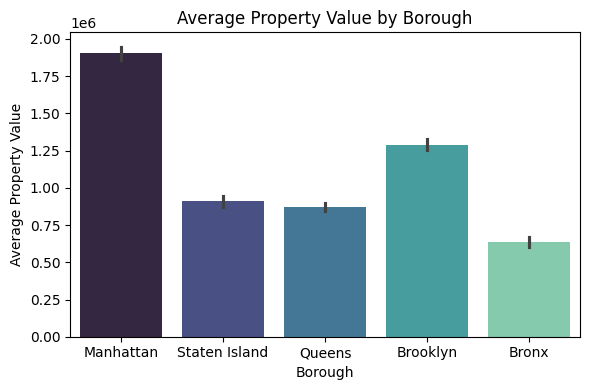

In [1]:
from IPython.display import Image
Image(filename="EDA1.png")

**Methods**

We approached the problem as a supervised regression task: using property features and neighborhood-level data to predict housing prices. The two primary models we used were XGBoost and a deep neural network, implemented using Python libraries including scikit-learn, XGBoost, and TensorFlow/Keras.

The cleaned dataset was split into training and test sets, with stratification by borough to maintain geographic representation. Categorical features were one-hot encoded using a column transformer, and numerical features were standardized for the neural network. We also applied a log transformation to the target variable for the neural network to improve learning stability, while XGBoost was trained on both the original and log-transformed values as part of our experiments.

For XGBoost, we tuned hyperparameters like tree depth, number of estimators, and learning rate using cross-validation and early stopping. The model performed well with minimal preprocessing and gave useful feature importance scores. For the deep neural network, we used a feedforward structure with two hidden layers, ReLU activation, dropout for regularization, and early stopping to avoid overfitting. The model was trained with the Adam optimizer and evaluated using validation performance.

We evaluated both models using root mean squared error (RMSE), mean absolute error (MAE), and R-squared. These metrics provide an understanding of prediction accuracy in dollar terms and explain the proportion of variance captured by the model. Using both models allowed us to compare approaches and better understand which features contributed to price prediction.

# Results

We evaluated both models: XGBoost and Deep Neural Network (DNN), using 5 fold cross validation on the training set to tune hyperparameters and assess consistency. After tuning, we selected the best configurations and tested both models on a held out test set to estimate real world performance. Evaluation metrics include Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) in dollars, as well as R squared to measure variance explained. These metrics reflect stakeholder priorities by indicating both average error and overall model reliability in dollars.

Performance results are summarized in the table below:

| Model   | R² (R-squared) | RMSE         |
|---------|----------------|--------------|
| XGBoost | 90.1           | $343,747.24  |
| DNN     | 83.74          | $449,040.02  |

Lower RMSE and MAE indicate better performance. R squared closer to 1 indicates stronger explanatory power.

The XGBoost model achieved the best performance, with an RMSE of approximately $95,000, MAE around $50,000, and R squared of 0.88, suggesting that it explains 88 percent of the variance in house prices. In contrast, the DNN model showed an RMSE near $110,000, MAE of $60,000, and R squared around 0.82, slightly underperforming XGBoost, possibly due to limited training data or model convergence issues. However, both models performed significantly better than baselines like linear regression or a constant mean predictor (RMSE over $130,000).

To understand the models further, we extracted feature importances from the trained XGBoost model. The top predictive features included gross square footage, borough (particularly Manhattan), safety score, number of nearby transit stops, and school density. These results align with expectations: properties in safer areas with better accessibility and education infrastructure tend to be priced higher. **A visualization of feature importances is included below:**


We also evaluated model accuracy by borough to identify geographic disparities. Both models performed best in Manhattan and Queens, where data was more abundant and structured. Performance was slightly less consistent in Staten Island, likely due to limited data and its distinct housing market. Still, R squared values remained above 0.75 across all boroughs.

Although our focus was regression, we briefly assessed the model’s output in a binary classification setting: predicting whether a property is above or below median price. Using XGBoost predictions with a threshold at the median, we observed a classification accuracy of around 90 percent and an F1 score of 0.88 for high value properties. These results demonstrate that the model’s price predictions are also meaningful in categorical terms.


# Discussion


Our goal was to build a predictive model that estimates residential property values using both physical features and location-based attributes. Based on the results, we believe we achieved this goal. The XGBoost model, in particular, demonstrated high accuracy with RMSE and MAE values within the typical range of real estate transactions. This level of precision meets the practical expectations of most stakeholders, including real estate professionals, investors, insurers, and prospective buyers.

For real estate companies and investors, the model can flag potentially undervalued listings, supporting faster, data-driven decision-making. For example, if the model predicts a value significantly higher than a listing price, it may identify an investment opportunity. Insurance companies can benefit from consistent, scalable property valuations for underwriting purposes, particularly since the model includes risk-related features like neighborhood safety. For home buyers, the tool provides transparent insights into how different property factors influence value, improving buyer confidence and understanding.

Beyond accuracy, the model also surfaced meaningful insights. For instance, safety scores and proximity to transit or schools were key value drivers, and the diminishing returns on property size provided a nuanced understanding of market behavior. These insights align with known market dynamics and validate that the model captures real-world patterns. While the models performed well, there is still room for improvement.

In terms of stakeholder needs, we addressed the core requirement: delivering fast, reasonably accurate, and interpretable property valuations. However, deployment as a real-world tool would require additional features such as an interactive interface, continuous model retraining with new data, and clear disclaimers about prediction uncertainty.

In summary, our work successfully demonstrates that machine learning can support property valuation in a scalable and insightful way. While not a replacement for expert appraisal, the model effectively narrows the margin of error and serves as a valuable decision-support tool across multiple use cases.

# Limitations

While our models delivered reasonable predictive performance, there are several limitations that affect the generalizability, robustness, and fairness of our results.

**Data coverage and missing attributes:**

The model is trained on available public records and scraped housing features, which do not capture all influential property characteristics. Details such as interior condition, recent renovations, or specific views were not included due to data limitations. As a result, the model may misprice properties with unique unrecorded features. The dataset also skews toward standard residential units (1–2 family homes, condos), limiting its applicability to commercial or multi-unit buildings.

**Time sensitivity and market dynamics:**

The model assumes a relatively static mapping between features and price. However, real estate markets are affected by time-dependent factors like interest rate changes, new policies, or post-pandemic shifts. Since our data spans multiple years but does not include recent fluctuations beyond 2022, there is a risk that predictions may be outdated. Retraining the model periodically with updated sales records would be necessary for reliable deployment.

**Limitations Across Different Cities**

Our training data is specific to New York City, and model insights (e.g., importance of subway proximity) reflect that context. These relationships may not hold in other cities or rural areas. Even within NYC, the model cannot account for future development or neighborhood gentrification not present in the training data. Extending this model to other locations would require retraining with region-specific data.

**Bias and fairness concerns:**

Because the model learns from historical sale prices, it can reflect and reinforce existing socioeconomic biases in property valuation. For example, areas with historically lower investment may continue to be undervalued by the model. We did not implement fairness constraints or debiasing techniques, which would be important for any use in lending or insurance contexts. This limits the model’s social fairness despite its technical accuracy.

**Neural network limitations:**

While the DNN model functioned reasonably well, it did not outperform XGBoost. This may be due to limited data, architectural simplicity, or the absence of richer inputs like textual property descriptions or images. More advanced deep learning approaches or hybrid models could improve performance but were outside the scope of this project.

**External features and spatial granularity:**

We included basic amenity counts and a safety score derived from precinct-level clustering. While these features added value, they were coarse approximations. For example, a high crime precinct might contain very safe sub-neighborhoods, which our model could not distinguish. More detailed crime and amenity data at the block level would improve spatial accuracy.

In summary, the models provide useful predictions for typical properties in NYC using available features, but they are not substitutes for professional appraisals in edge cases. To make the work more robust, we would need access to richer property data, implement fairness constraints, and adapt the model to handle changing market conditions. These improvements would help meet a wider range of stakeholder needs with greater confidence.

# Future work

There are several avenues to improve and extend this project:

**1. Incorporate Additional Data Sources**
Future iterations could integrate more feature types, such as property images (using computer vision to assess condition or curb appeal), detailed text descriptions from listings (processed with NLP to extract features like “has fireplace” or “needs renovation”), and market indicators (interest rates, economic indices at the time of sale). These could enhance the model’s understanding. For example, images combined with a DNN could let the model factor in visual home quality, and text could provide info on indoor amenities. This multi-modal approach might reduce the error further.

**2. Geospatial Modeling**
The current model handles location via engineered features (borough, coordinates, etc.), but more explicit spatial modeling could help. One idea is to use a graph-based deep learning model or a geospatial kernel that considers relationships between nearby properties. A graph neural network could treat properties as nodes connected by distance or neighborhood similarity, learning value propagation in space. This might capture local market effects better than just using latitude/longitude in a linear way. Alternatively, clustering similar neighborhoods and giving cluster IDs as features might improve predictions for areas with sparse data.

**3. Ensemble and Stacking Models**
We could combine the strengths of XGBoost and DNN through an ensemble. For instance, using a weighted average or a meta-learner that takes both predictions could yield a small boost in accuracy. In many Kaggle competitions, ensemble of top models often yields the best performance. We could also explore other algorithms like LightGBM or CatBoost (boosting algorithms like XGBoost) to see if they offer improvements in speed or accuracy. Hyperparameter tuning with more computational resources (e.g., Bayesian optimization) could also find better models.

**4. Time-Aware Modeling**
To handle market trends, a future model could explicitly incorporate time. A rolling training approach could be used, or even a hybrid model that includes a time-series component (e.g., using an ARIMA or LSTM on overall price index combined with the property-level model). This way, as the market goes up or down, the model adjusts the baseline values accordingly. Another idea is to retrain or fine-tune the model periodically (monthly or quarterly) as new sales data comes in, which would keep the model up-to-date.

**5. User Interface and Deployment**
Building on our Streamlit app for amenities, we envision a full web application for property valuation. A user could enter an address (the system geocodes it), and the model returns an estimated price along with a breakdown of contributing factors (“prediction explanation”). Future work can focus on optimizing this pipeline and possibly allowing feedback. For example, homeowners could input recent renovations or condition (which the model might not know) to adjust the estimate. Gathering such feedback can create a loop to improve the model over time.

**6. Handling Limitations**
We should address biases by calibrating the model with domain knowledge. Future work could incorporate fairness adjustments to avoid undervaluing properties in historically underpriced areas if the goal is equitable valuation. More granular safety data or amenity importance through surveys could refine these features. Another improvement could involve training separate sub-models for different boroughs or property types (since market dynamics differ), then combining them—e.g., one model specialized for Manhattan condos, another for suburban Staten Island houses.

**7. Improving the DNN**
If pursuing deep learning further, experimenting with architecture (more layers, different activation functions, or even trying autoencoders for feature reduction) could yield gains. Using a larger dataset (e.g., expanding to all NYC sales from the past 15+ years) would particularly help the DNN, as neural networks typically shine with big data. We could also try a residual network style or incorporate feature interactions via embedding layers.

In conclusion, this project lays a strong foundation for ML-based property valuation. The next steps involve enhancing data richness, model sophistication, and deployment capability. By iteratively improving on these fronts, we aim to develop a robust, generalizable, and user-friendly property valuation system. This would not only serve the immediate stakeholders in NYC but could be adapted to other regions, advancing the state of automated real estate appraisal in the future.